# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
DATA_FOLDER = 'Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [2]:
import numpy as np
import pandas as pd

from pandas import IndexSlice as pidx

import glob

In [3]:
csv_files = glob.glob(DATA_FOLDER+"ebola/guinea*/*.*")

### importing the csv files into one dataframe

In [4]:
frame = pd.DataFrame()
for csv_file in csv_files:
    frame = frame.append(pd.read_csv(csv_file))

# creating a multi-index
frame = frame.set_index(["Date", "Description"])

frame.sort_index(inplace=True)

In [5]:
ill_cumulative = "Cumulative (confirmed + probable + suspects)"
ill_confirmed = "New cases of confirmed"
ill_probable = "New cases of probables"
ill_suspects = "New cases of suspects"

dead_total = "New deaths registered today"
dead_confirmed = "New deaths registered today (confirmed)"
dead_probable = "New deaths registered today (probables)"
dead_suspect = "New deaths registered today (suspects)"

In [6]:
frame.head(20)

Beyla Boffa  \
Date       Description                                                      
2014-08-04 Cumulative (confirmed + probable + suspects)         NaN    23   
           New cases of confirmed                               NaN     0   
           New cases of probables                               NaN     0   
           New cases of suspects                                NaN     0   
           New deaths registered today                          NaN     0   
           New deaths registered today (confirmed)              NaN     0   
           New deaths registered today (probables)              NaN     0   
           New deaths registered today (suspects)               NaN     0   
           Number of confirmed cases among health workers       NaN     0   
           Number of contacts followed yesterday                NaN     0   
           Number of contacts out of track                      NaN   397   
           Number of contacts to follow today                   NaN     0   
           Number of death of confirmed cases among health...   NaN     0   
           Number of deaths of confirmed cases among healt...   NaN     0   
           Number of deaths of probables cases among healt...   NaN     0   
           Number of female confirmed cases                     NaN     8   
           Number of female probables cases                     NaN     2   
           Number of female suspects cases                      NaN     0   
           Number of male confirmed cases                       NaN    10   
           Number of male probables cases                       NaN     3   

                                                              Conakry Coyah  \
Date       Description                                                        
2014-08-04 Cumulative (confirmed + probable + suspects)            95   NaN   
           New cases of confirmed                                   1   NaN   
           New cases of probables                                   0   NaN   
           New cases of suspects                                    5   NaN   
           New deaths registered today                              0   NaN   
           New deaths registered today (confirmed)                  0   NaN   
           New deaths registered today (probables)                  0   NaN   
           New deaths registered today (suspects)                   0   NaN   
           Number of confirmed cases among health workers          16   NaN   
           Number of contacts followed yesterday                  331   NaN   
           Number of contacts out of track                       1242   NaN   
           Number of contacts to follow today                     350   NaN   
           Number of death of confirmed cases among health...       0   NaN   
           Number of deaths of confirmed cases among healt...      10   NaN   
           Number of deaths of probables cases among healt...       1   NaN   
           Number of female confirmed cases                        30   NaN   
           Number of female probables cases                         4   NaN   
           Number of female suspects cases                          4   NaN   
           Number of male confirmed cases                          48   NaN   
           Number of male probables cases                           4   NaN   

                                                              Dabola Dalaba  \
Date       Description                                                        
2014-08-04 Cumulative (confirmed + probable + suspects)            4    NaN   
           New cases of confirmed                                  0    NaN   
           New cases of probables                                  0    NaN   
           New cases of suspects                                   0    NaN   
           New deaths registered today                             0    NaN   
           New deaths registered today (confirmed)                 0    NaN

### cleaning the data

In [7]:
# some preliminary data cleaning
# if nothing has been recorded, I assume that 0 cases have occured
frame = frame.fillna(0)

### setting up helpers to select months from the data

instead I'm using a date_range object to create timestamps for the selection of the months

In [8]:
# pandas date_range allows the automatic creation of timestamps
# before using them as indexes in the dataframe, a conversion is necessary
# the timestamp includes the time, too, which needs to be removed
# the timestamp.date() method keeps only the year-month-day representation
# and they need to be converted to strings

month_starts = pd.date_range(start="2014-08-01", end="2014-12-31", freq="MS")
month_starts = [str(entry.date()) for entry in month_starts]

month_ends = pd.date_range(start="2014-08-01", end="2014-12-31", freq="M")
month_ends = [str(entry.date()) for entry in month_ends]

In [9]:
# to make indexing even easier, I'm creating a list of slices
months=[]
for i in range(len(month_starts)):
    months.append(slice(month_starts[i], month_ends[i]))

In [10]:
print(months[0])
print(months[1])
print(months[2])

slice('2014-08-01', '2014-08-31', None)
slice('2014-09-01', '2014-09-30', None)
slice('2014-10-01', '2014-10-31', None)


### now creating the monthly statistics

In [11]:
# a demo for one single month and one single type of records:

month = months[0]
selection = frame.loc[(pidx[month, ill_confirmed]), :]

# convert to float
selection = selection.astype(float)

# total number of new cases
total_ill_confirmed = selection.sum().sum()

# for how many days do we have records ?
days = selection.shape[0]

daily_ill_confirmed = total_ill_confirmed / days

print("From "+month.start+ " to " + month.stop+ ", there has been a daily average of "
      +str(daily_ill_confirmed)+ " new cases of confirmed illnesses")

From 2014-08-01 to 2014-08-31, there has been a daily average of 24.8 new cases of confirmed illnesses


In [12]:
cumulative_selection = frame.loc[(pidx[month, ill_cumulative]), :]

selection.astype(float).sum(axis=1)

Date        Description           
2014-08-04  New cases of confirmed     8.0
2014-08-26  New cases of confirmed    20.0
2014-08-27  New cases of confirmed    20.0
2014-08-30  New cases of confirmed    18.0
2014-08-31  New cases of confirmed    58.0
dtype: float64

In [13]:
ill_confirmed_data = frame.loc[(pidx[month, ill_confirmed]),:]
ill_confirmed_data = ill_confirmed_data.astype(float).sum(axis=1)

ill_probable_data = frame.loc[(pidx[month, ill_probable]),:]
ill_probable_data = ill_probable_data.astype(float).sum(axis=1)

ill_suspects_data = frame.loc[(pidx[month, ill_suspects]), :]
ill_suspects_data = ill_suspects_data.astype(float).sum(axis=1)

In [14]:
ill_confirmed_data.values + ill_probable_data.values + ill_suspects_data.values

array([ 18.,  56.,  44.,  48.,  92.])

In [15]:
30 * 20

600

In [16]:
selection.sum()

Beyla           0.0
Boffa           0.0
Conakry         8.0
Coyah           0.0
Dabola          0.0
Dalaba          0.0
Dinguiraye      0.0
Dubreka         6.0
Forecariah      0.0
Gueckedou      10.0
Kerouane        0.0
Kindia          0.0
Kissidougou     0.0
Kouroussa       0.0
Lola            0.0
Macenta        34.0
Mzerekore       0.0
Nzerekore       0.0
Pita            1.0
Siguiri         0.0
Telimele        0.0
Totals         62.0
Yomou           3.0
dtype: float64

In [17]:
"28%".strip()

'28%'

In [18]:
# this is my DataFrame
test = pd.DataFrame([
{"a":1, "b":"1", "c":11, "d": 11},
{"a":1, "b":"2", "c":12, "d": 11},
{"a":2, "b":"1", "c":21, "d": 11},
{"a":2, "b":"2", "c":22, "d": 11},
{"a":3, "b":"1", "c":31, "d": 11},
{"a":3, "b":"2", "c":32, "d": 11}])

# now set a and b as multiindex
test = test.set_index(["a","b"])

In [19]:
test.groupby("c").sum()

,d
c,
11,11
12,11
21,11
22,11
31,11
32,11


In [20]:
# looping over the entire data


In [21]:
days

5

In [22]:
august.astype(float).sum().sum()

NameError: name 'august' is not defined

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [122]:
# get the filepaths
mid_files = glob.glob(DATA_FOLDER+"/microbiome/MID*.*")
meta_files = glob.glob(DATA_FOLDER+"/microbiome/meta*.*")

assert len(mid_files)>=1, "there should be at least on file with mid data"
assert len(meta_files)==1, "there should be one file with metadata"
meta_file = meta_files[0]

In [123]:
# parse the files
mid_frames = []
for file in mid_files:
    mid_frames.append(pd.read_excel(file, header=None).rename(columns={0:"NAME", 1:"AMOUNT"}))
    
meta_frame= pd.read_excel(meta_file)

In [124]:
# add the meta information to the biome frames
for i in range(len(mid_frames)):
    mid_frame = mid_frames[i]
    meta_row = meta_frame.loc[i]
    
    for colname in meta_frame.columns:
        mid_frame[colname] = meta_row[colname]

In [125]:
meta_frame

,BARCODE,GROUP,SAMPLE
0,MID1,EXTRACTION CONTROL,NaN
1,MID2,NEC 1,tissue
2,MID3,Control 1,tissue
3,MID4,NEC 2,tissue
4,MID5,Control 2,tissue
5,MID6,NEC 1,stool
6,MID7,Control 1,stool
7,MID8,NEC 2,stool
8,MID9,Control 2,stool


In [126]:
mid_frames[0].head(1)

,NAME,AMOUNT,BARCODE,GROUP,SAMPLE
0,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",1,MID1,EXTRACTION CONTROL,NaN


In [127]:
meta_frame.fillna("unknown")

,BARCODE,GROUP,SAMPLE
0,MID1,EXTRACTION CONTROL,unknown
1,MID2,NEC 1,tissue
2,MID3,Control 1,tissue
3,MID4,NEC 2,tissue
4,MID5,Control 2,tissue
5,MID6,NEC 1,stool
6,MID7,Control 1,stool
7,MID8,NEC 2,stool
8,MID9,Control 2,stool


In [128]:
joint_frame = pd.DataFrame()
joint_frame["NAME"]=mid_frames[0]["NAME"]

for i in range(9):
    group = meta_frame.loc[i]["GROUP"]
    sample = meta_frame.loc[i]["SAMPLE"]
    mid_frame = mid_frames[i]
    
    
    joint_frame[str(group)+" "+str(sample)]=mid_frame["AMOUNT"]
    
    #joint_frame["GROUP-MID"+str(i)]=group
    #joint_frame["SAMPLE-MID"+str(i)]=sample
    #joint_frame["AMOUNT-MID"+str(i)]=mid_frame["AMOUNT"]

In [129]:
joint_frame.fillna("unknown")

,NAME,EXTRACTION CONTROL nan,NEC 1 tissue,Control 1 tissue,NEC 2 tissue,Control 2 tissue,NEC 1 stool,Control 1 stool,NEC 2 stool,Control 2 stool
0,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",1,1,7,5,7,1,2,2,1
1,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",15,9,1,26,2,8,14,1,16
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",14,1,1,28,3,2,23,1,2
3,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",4,1,2,1,3,1,1,1,5
4,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1,2,5,5,7,1,2,10,6
5,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1,20,4,2,1,1,1,1,2
6,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",3,9,4,2,1,5,2,1,5
7,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",4,116,1,3,1,3,10,1,3
8,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",2,302,12,14,1,5,11,1,14
9,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",5,17,2,5,1,18,9,1,1


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [135]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

# 1. importing and cleaning the data

In [136]:
titanic_frame = pd.read_excel("Data/titanic.xls")
titanic_frame.shape

(1309, 14)

In [137]:
titanic_frame.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [138]:
# look at the datatypes in the frame
for colname in titanic_frame.columns:
    print("The column "+colname+ " has the following dtype: "+str(titanic_frame[colname].dtype))

The column pclass has the following dtype: int64
The column survived has the following dtype: int64
The column name has the following dtype: object
The column sex has the following dtype: object
The column age has the following dtype: float64
The column sibsp has the following dtype: int64
The column parch has the following dtype: int64
The column ticket has the following dtype: object
The column fare has the following dtype: float64
The column cabin has the following dtype: object
The column embarked has the following dtype: object
The column boat has the following dtype: object
The column body has the following dtype: float64
The column home.dest has the following dtype: object


In [139]:
# converting the columns

# pclass -> categorical
titanic_frame["pclass"] = pd.Categorical(titanic_frame["pclass"])

# survived -> categorical
titanic_frame["survived"] = pd.Categorical(titanic_frame["survived"])

# name -> string
titanic_frame["name"] = titanic_frame["name"].astype(str)

# sex -> categorical
titanic_frame["sex"] = pd.Categorical(titanic_frame["sex"])
#titanic_frame["sex"] = titanic_frame["sex"].astype(str)

# age -> int
# for some persons, age is unknown
# as a placeholder, I'm using -1
titanic_frame["age"] = titanic_frame["age"].fillna(-1).astype(np.int64)

# sibsp -> categorical
titanic_frame["sibsp"] = pd.Categorical(titanic_frame["sibsp"])

# parch -> categorical
titanic_frame["parch"] = pd.Categorical(titanic_frame["parch"])

# ticket -> string
# ticket is not just a number but contains additional information
titanic_frame["ticket"] = titanic_frame["ticket"].astype(str)

# fare is already float

# cabin -> string
titanic_frame["cabin"] = titanic_frame["cabin"].astype(str)

# embarked -> categorical
titanic_frame["embarked"] = pd.Categorical(titanic_frame["embarked"])

# boat can be a number, a string or nan
# I'm converting this to a string and filling it with "unknown"
titanic_frame["boat"] = titanic_frame["boat"].fillna("unkown").astype(str)

# body -> int
# body is a number if the passenger has not survived and the body was recovered
# I'm converting this to int and using -1 as placeholder for unknown
titanic_frame["body"] = titanic_frame["body"].fillna(-1).astype(int)

# home.dest -> string
# using "unknown" as placeholder
titanic_frame["home.dest"] = titanic_frame["home.dest"].astype(str).replace("nan", "unknown")

# 2. histograms

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

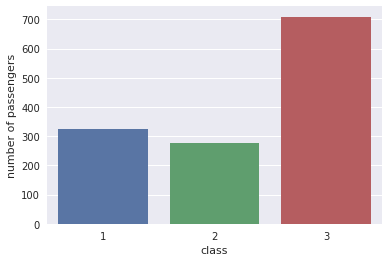

In [141]:
class_counts = [sum(titanic_frame["pclass"]==1),
                sum(titanic_frame["pclass"]==2),
                sum(titanic_frame["pclass"]==3)]
                

fig, ax = plt.subplots(1,1)
sns.barplot(x=[1,2,3], y=class_counts, ax = ax)
ax.set(xlabel="class", ylabel="number of passengers")
plt.show()

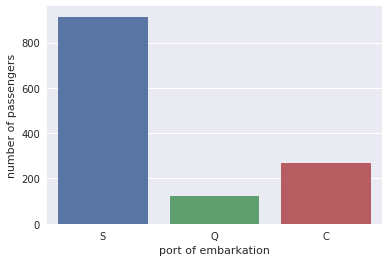

In [142]:
embarked_counts = [sum(titanic_frame["embarked"]=="S"),
                sum(titanic_frame["embarked"]=="Q"),
                sum(titanic_frame["embarked"]=="C")]
                

fig, ax = plt.subplots(1,1)
sns.barplot(x=["S", "Q", "C"], y=embarked_counts, ax = ax)
ax.set(xlabel="port of embarkation", ylabel="number of passengers")
plt.show()

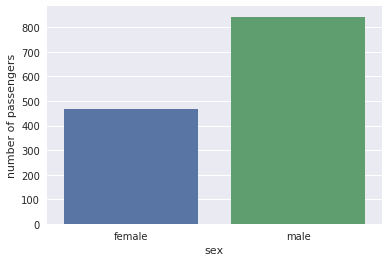

In [143]:
sex_counts = [sum(titanic_frame["sex"]=="female"),
                sum(titanic_frame["sex"]=="male")]
                

fig, ax = plt.subplots(1,1)
sns.barplot(x=["female", "male"], y=sex_counts, ax = ax)
ax.set(xlabel="sex", ylabel="number of passengers")
plt.show()

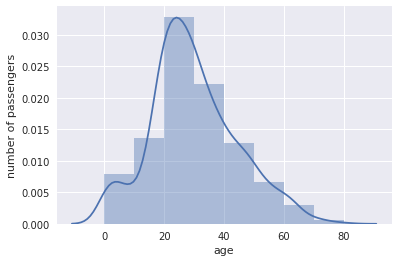

In [144]:
# get all ages and filter out unknown
ages = titanic_frame["age"]
known_ages = ages[ages>=0]


fig, ax = plt.subplots(1,1)
#ax.hist(known_ages, bins=[0,10,20,30,40,50, 60, 70, 80, 90, 100])
sns.distplot(known_ages, bins=[0,10,20,30,40,50,60,70,80,90], ax = ax, hist={range:10})
ax.set(xlabel="age", ylabel="number of passengers")
plt.show()

# 3. pie chart for cabin floor

In [145]:
# there are 7 floors labelled from A to G
floor_counts = [ sum(titanic_frame["cabin"].apply(lambda x : x[0]=="A")),
                sum(titanic_frame["cabin"].apply(lambda x : x[0]=="B")),
                sum(titanic_frame["cabin"].apply(lambda x : x[0]=="C")),
                sum(titanic_frame["cabin"].apply(lambda x : x[0]=="D")),
                sum(titanic_frame["cabin"].apply(lambda x : x[0]=="E")),
                sum(titanic_frame["cabin"].apply(lambda x : x[0]=="F")),
                sum(titanic_frame["cabin"].apply(lambda x : x[0]=="G"))]

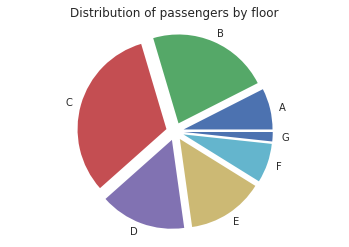

In [146]:
fig, ax = plt.subplots(1,1)

labels = ["A", "B", "C", "D", "E", "F", "G"]
explode = (0.1,)*len(labels)
ax.pie(floor_counts, labels=labels, explode=explode, startangle=0)
ax.axis("equal")
ax.set(title="Distribution of passengers by floor")

plt.show()

# 4. survivors by class

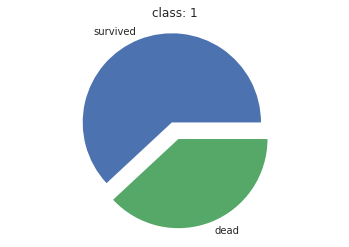

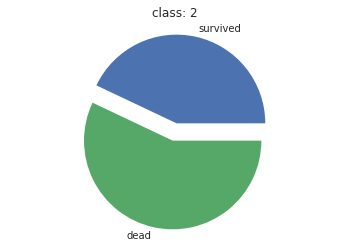

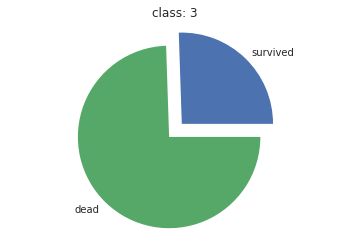

In [147]:
classes=[1,2,3]

for c in classes:
    survivors = titanic_frame.query("pclass=={} and survived==1".format(c)).shape[0]
    deaths = titanic_frame.query("pclass=={} and survived==0".format(c)).shape[0]
    total = survivors + deaths
    
    survivors /= total
    deaths /= total
    
    fig, ax = plt.subplots(1,1)

    labels = ["survived", "dead"]
    explode = (0.1,)*len(labels)
    ax.pie([survivors, deaths], labels=labels, explode=explode, startangle=0)
    ax.axis("equal")
    ax.set(title="class: "+str(c))
    
plt.show()


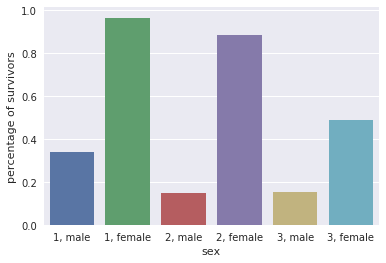

In [148]:
classes=[1,2,3]
sexes=['male', "female"]

counts=[]
labels=[]

for c in classes:
    for s in sexes:
        survivors = titanic_frame.query("pclass=={} and survived==1".format(c))
        survivors = sum(survivors["sex"]==s)
        deaths = titanic_frame.query("pclass=={} and survived==0".format(c))
        deaths = sum(deaths["sex"]==s)
        total = survivors + deaths
    
        survivors /= total
        
        counts.append(survivors)
        labels.append(str(c)+", "+s)
        

fig, ax = plt.subplots(1,1)
sns.barplot(x=labels, y=counts, ax = ax)
ax.set(xlabel="sex", ylabel="percentage of survivors")
plt.show()

In [149]:
survivors

0.49074074074074076

# 5. dataframe for survivors by age, class and sex

I'm leaving out entries where the age is not known

In [150]:
age_frame =titanic_frame[titanic_frame["age"]!=-1]
number = age_frame.shape[0]

In [151]:
cdf = []

for i in range(100):
    cdf.append(sum(age_frame["age"]<=i)/number)

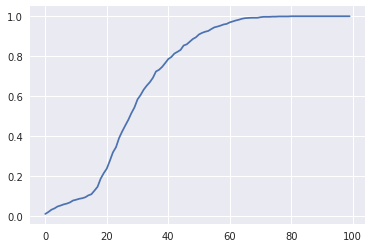

In [152]:
plt.plot(cdf)

In [153]:
for i in range(100):
    if cdf[i]>0.5:
        partition=i
        break

In [154]:
partition

28

### The median of age is 28

In [155]:
lower_age = age_frame[age_frame["age"]<partition]
upper_age = age_frame[age_frame["age"]>=partition]

In [156]:
def analyze(frame):
    classes=[1,2,3]
    sexes=['male', "female"]

    data={}
    for c in classes:
        for s in sexes:
            survivors = frame.query("pclass=={} and survived==1".format(c))
            survivors = sum(survivors["sex"]==s)
            deaths = frame.query("pclass=={} and survived==0".format(c))
            deaths = sum(deaths["sex"]==s)
            total = survivors + deaths

            survivors /= total

            if c not in data:
                data[c]={}

            data[c][s]=survivors
    return data
            
lower_age_data=analyze(lower_age)
upper_age_data= analyze(upper_age)

In [157]:
joined = {"younger":lower_age_data, "older":upper_age_data}

this dictionary needs to be converted for pandas

pandas can parse dicts to multi-index frames, but only if the dicts have this layout:

(key1, key2, ...) : value

In [158]:
multiindex_dict = {(key1, key2, key3):val3 for key1, val1 in joined.items()
                   for key2, val2 in val1.items()
                   for key3, val3 in val2.items()
                  }


In [159]:
multiindex_dict

{('older', 1, 'female'): 0.967741935483871,
 ('older', 1, 'male'): 0.30894308943089432,
 ('older', 2, 'female'): 0.88461538461538458,
 ('older', 2, 'male'): 0.077777777777777779,
 ('older', 3, 'female'): 0.34782608695652173,
 ('older', 3, 'male'): 0.13043478260869565,
 ('younger', 1, 'female'): 0.94999999999999996,
 ('younger', 1, 'male'): 0.5357142857142857,
 ('younger', 2, 'female'): 0.90196078431372551,
 ('younger', 2, 'male'): 0.23529411764705882,
 ('younger', 3, 'female'): 0.52830188679245282,
 ('younger', 3, 'male'): 0.19431279620853081}

In [160]:
joined_frame = pd.DataFrame(multiindex_dict, index=[0])

In [161]:
joined_frame

older                                                   younger  \
          1                   2                   3                 1   
     female      male    female      male    female      male  female   
0  0.967742  0.308943  0.884615  0.077778  0.347826  0.130435    0.95   

                                                     
                    2                   3            
       male    female      male    female      male  
0  0.535714  0.901961  0.235294  0.528302  0.194313